# Fixed Income Derivatives - Construction of the Swap Market Model
In the following, we will consider a swap market model and in particular, we will consider a set of Libor
fixing times $T_0,T_1,...,T_N$ corresponding to Libor payments paid or received one period later at times
$T_1,T_2,...,T_{N+1}$. The time $t$ par swap rate of a payer or receiver swap with first fixing taking place at time
$T_n$ and cashflows to both the fixed and floating legs taking place at times $T_{n+1},...,T_N$ will be denoted by
$R^N_n(t)$ and is given by
$$
R^N_n(t) = \frac{p_n(t)-p_N(t)}{\sum_{i=n+t}^N \alpha_i p_i(t)} = \frac{p_n(t)-p_N(t)}{S^N_n(t)}
$$
where $S^N_n(t)$ is the accrual factor and $p_i(t)$ is the time $t$ price of one unit of currency delivered at time $T_i$. Also recall that a $T_n \times (T_N −T_n)$ payer swaption with a strike $K$ is a contingent claim paying the value of a payer swap with first fixing at Tn and last cashflow at $T_N$ at time of exercise. The value of the underlying at time of exercise is
$$
PS_n^N(T_n,K) = (R_n^N(T_n)-K)S_n^N(T_n)
$$

In [2]:
import sys
import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
# add the directory
sys.path.append(os.path.abspath("../../Files"))

import numpy as np
import matplotlib.pyplot as plt

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

## Problem 1 - Constructing the swap market model
***See ChatGPT for proposed solution***

#### (a) Argue why the natural choice of numeraire for $R^k_n(t)$ is $S_k^n(t)$ and denote this measure by $\mathbb{Q}^k_n$. Prove that under this measure, $R^k_n(t)$ is a martingale and find $$\mathbb{E}^{\mathbb{Q}^N_n}\left[\frac{PSN_n^N(T_n)}{S_n^N(T_n)}\right]$$ as seen from $t<T_n$.

#### (b) Given the dynamics of $R^N_n(t)$ under $\mathbb{Q}^N_n$ in a swap market model and argue that this choice of dynamics will imply that swaption prices in a swap market model are given by Blacks formula

#### (c) Argue why the measure $\mathbb{Q}^{N+1}_N$ is essentially the $\mathbb{Q}^{N+1}$ forward measure and give the dynamics of the par swap rates under the unifying measure $\mathbb{Q}^{N+1}_N$

## Problem 2 - Simulation in the Swap Market Model
We will now simulate par swap rates using a swap market model. We will do so in a so called normal swap market model and in particular, we will simulate $R^5_0(t)$, $R^5_1(t)$, $R^5_2(t)$, $R^5_3(t)$, $R^5_4(t)$ under the measure $\mathbb{Q}^5_4$. To do so, we will need market data for swaption implied volatilities corresponding to swaptions with these par swap rates as the underlying asset. In the table below, we see Black implied volatilities for swaptions with $T_N = 5$ and $T_n$’s as stated in the first row. In addition, we will also need starting values for forward par swap rates and these will be found from the spot rates also given in the table below.
$$
\begin{array}{|c|c|c|c|c|c|}
\hline
T_n & 1 & 2 & 3 & 4 & 5 \\
\hline
R(0, T_n) & 0.03544326 & 0.04117089 & 0.04464488 & 0.04675195 & 0.04802996 \\
\hline
\bar{\sigma}_n & 0.084 & 0.102 & 0.119 & 0.141 & - \\
\hline
\end{array}
$$
Now, for reasons that will become clear, we will also need to simulate the normal not forward par swap rate for one year and we will do so using a diffusion coefficient of $\sigma_{0,5} = 0.072$

#### (a) Use the implied volatilities from the table above to find a vector of constant diffusion coefficients that we must use in our Swap market model for our model to be consistent with the market implied volatilities

The vector of diffusion coefficients is given by $\sigma = (\sigma_{0,5}, \sigma_{1,5}, \sigma_{2,5}, \sigma_{3,5}, \sigma_{4,5})$ follows directly out of the given implied volatilities.
$$
\sigma = \left[\sigma_{0,5}, \sigma_{1,5}, \sigma_{2,5}, \sigma_{3,5}, \sigma_{4,5}\right]' = \left[0.072, 0.084, 0.102, 0.119, 0.141\right]'
$$

#### (b) Explain why we need to compute zero coupon bond prices to compute the drift of par swap rates in the model and how this implies that we need to simulate at least one regular par swap rate
A par swap rate $R_n^N(t)$ is the fixed interest rate that equates the present value of fixed cash flows to the present value of floating cash flows over a specified period. Mathematically, it is defined as
$$
R^N_n(t) = \frac{p_n(t)-p_N(t)}{\sum_{i=n+t}^N \alpha_i p_i(t)} = \frac{p_n(t)-p_N(t)}{S^N_n(t)}
$$
From which it is obvious that ZCBs are fundamental building blocks in interest rate modeling and also affects the drift of the par swap rate

***See ChatGPT for in depth solution***

#### (c) Write a function in Python that computes the drift of the par swap rates in the swap market model and use this function to write another function that will allow you to simulate par swap rates $R^5_0(t)$, $R^5_1(t)$, $R^5_2(t)$, $R^5_3(t)$, $R^5_4(t)$ in a normal swap market model. Plot a simulated trajectory for the par swap rates in the model.

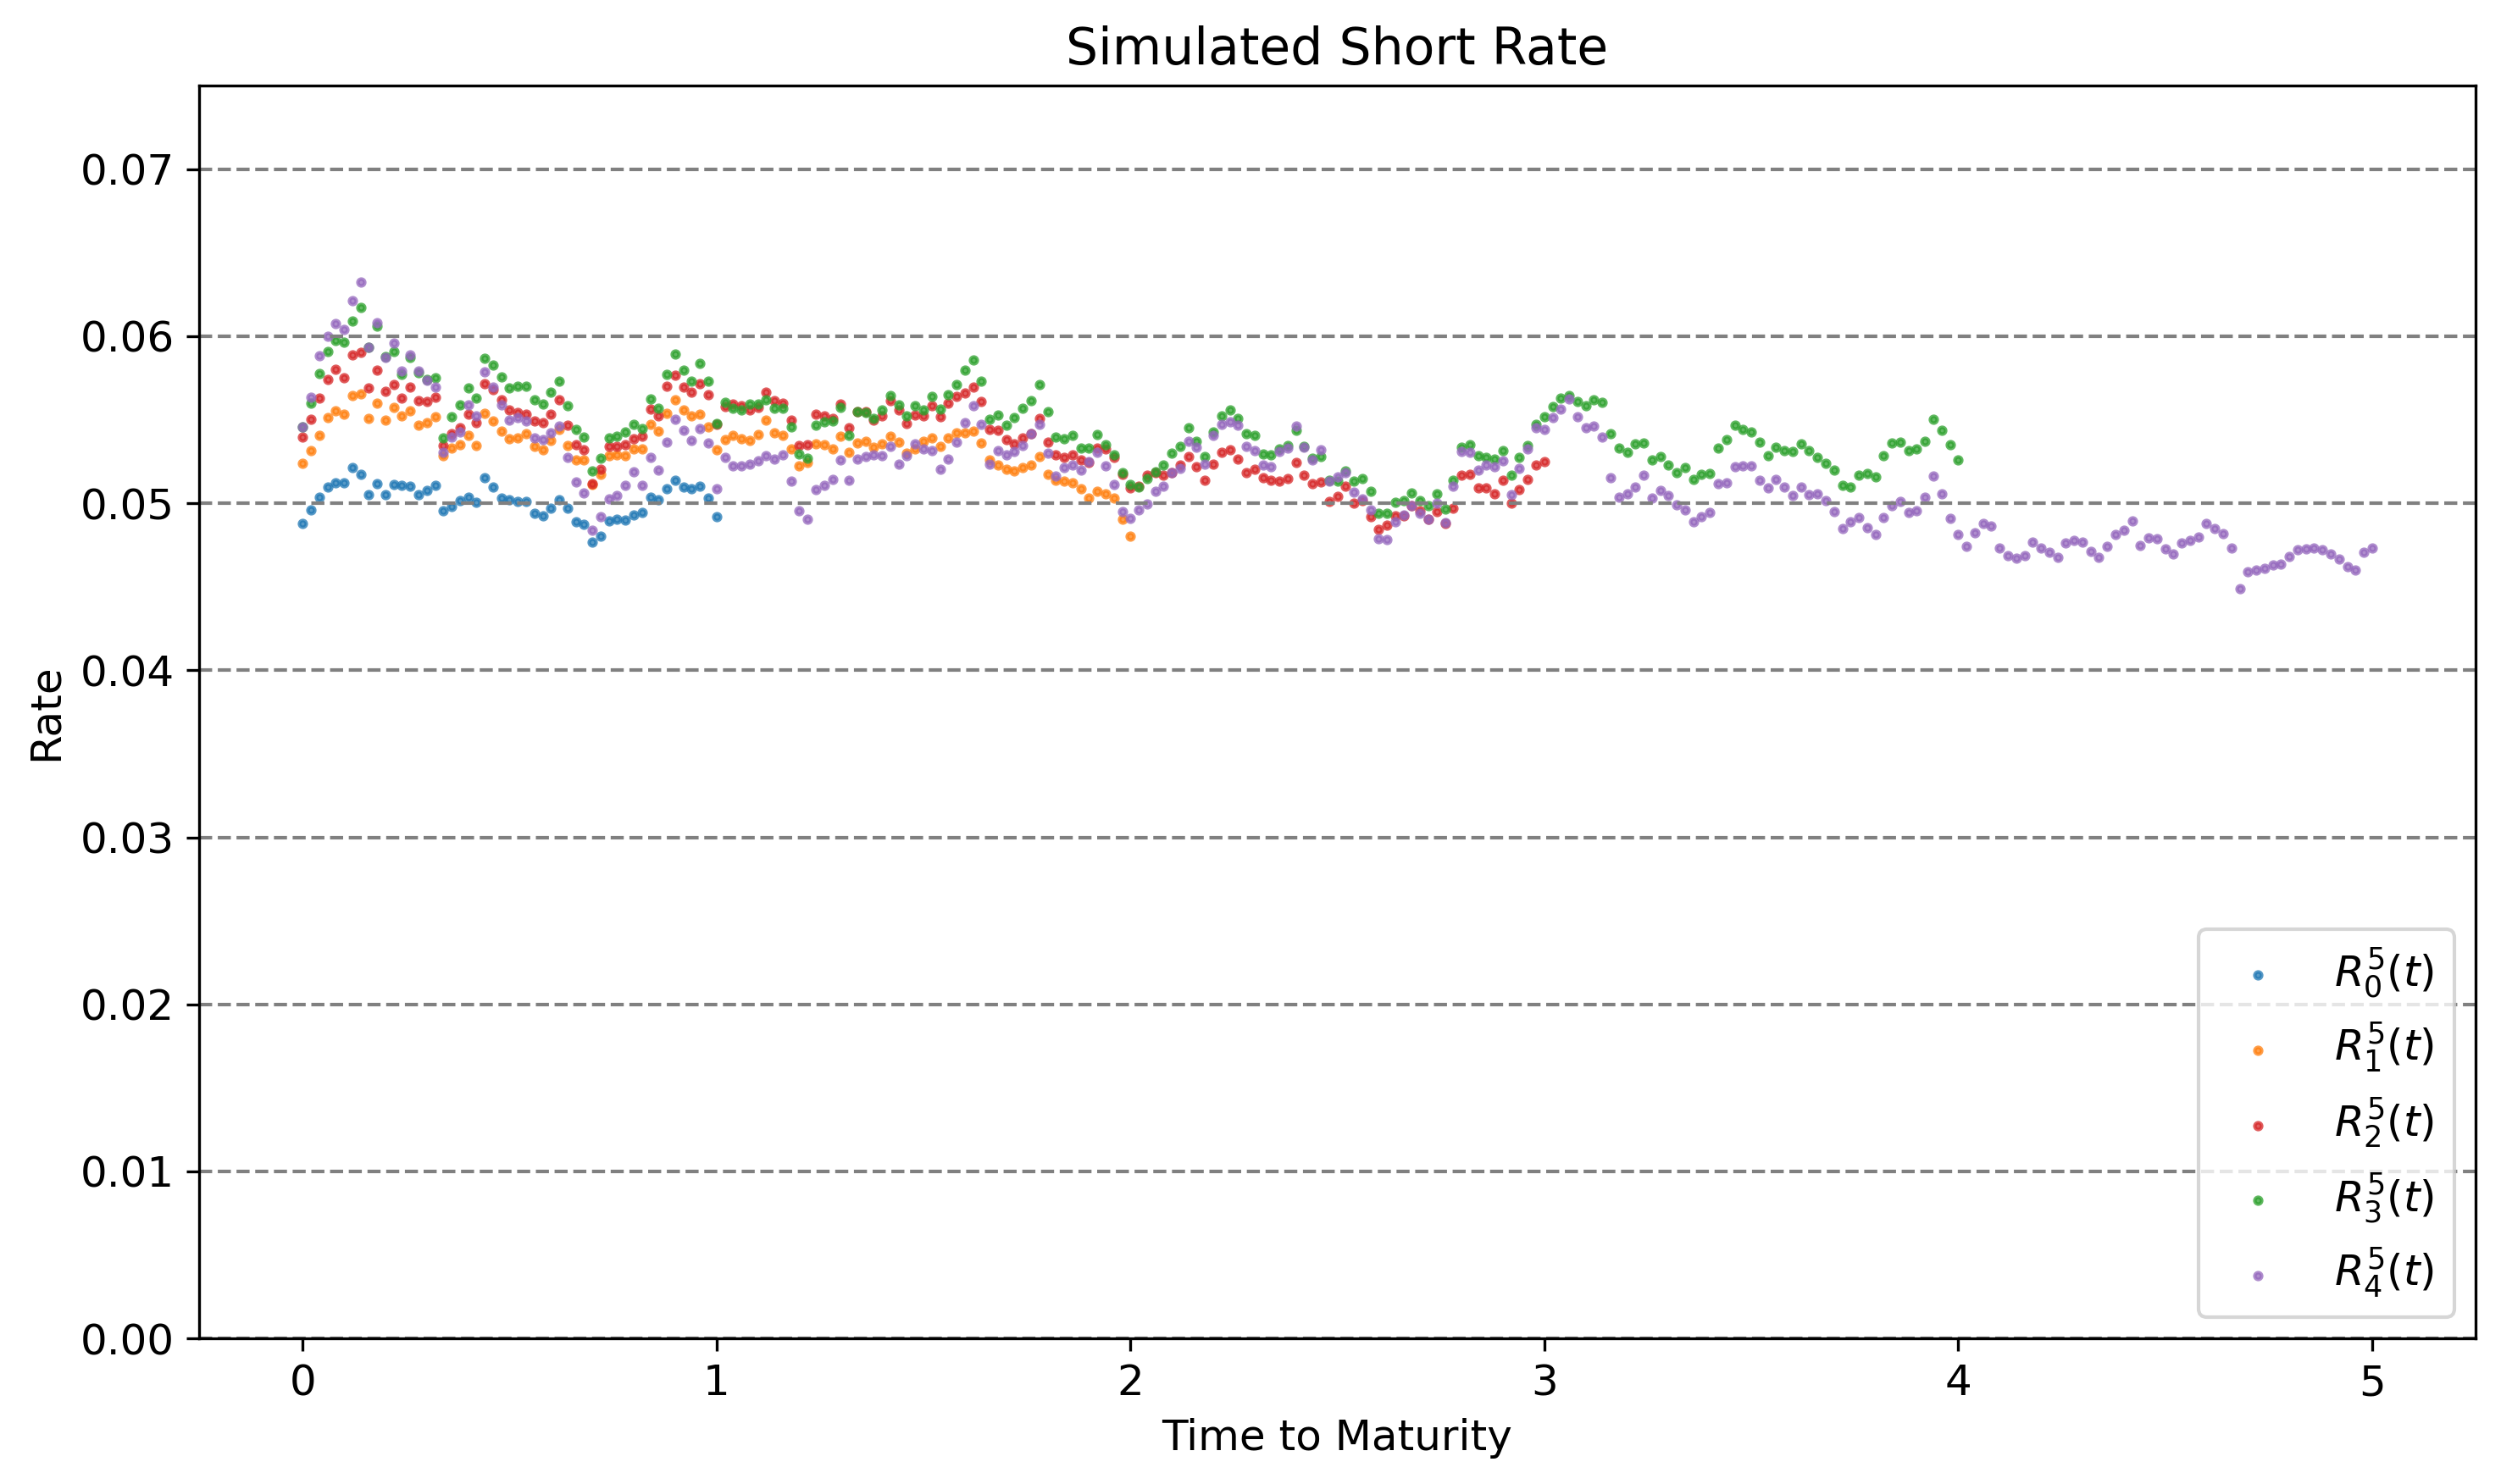

In [7]:
R = np.array([0.03544326, 0.04117089, 0.04464488, 0.04675195, 0.04802996])
sigma_swaption = np.array([0.072,0.084,0.102,0.119,0.141])
rho_swap = np.array([[1,0.95,0.9,0.85,0.8],[0.95,1,0.95,0.9,0.85],[0.9,0.95,1,0.95,0.9],[0.85,0.9,0.95,1,0.95],[0.8,0.85,0.9,0.95,1]])

M, alpha = 6, 1
T = np.array([m*alpha for m in range(0,M)])
p = np.ones(M)
alpha = np.zeros(M)
sigma_lmm = np.ones(M)
for i in range(1,M):
    p[i] = np.exp(-R[i-1]*T[i])
    alpha[i] = T[i]-T[i-1]
R_swap = np.zeros(M-1)
for i in range(0,M-1):
    R_swap[i], af = fid.swap_rate_from_zcb_prices(0,T[i],T[-1],"annual",T,p)

np.random.seed(2024)
M_simul = 250
t_simul = np.array([i*T[-1]/M_simul for i in range(0,M_simul+1)])
R_simul = fid.simul_smm(R_swap,T,sigma_swaption,rho_swap,M_simul)

simulations = [{'label':'$R_0^5(t)$','x':t_simul,'y':R_simul[0,:],'s':15},
               {'label':'$R_1^5(t)$','x':t_simul,'y':R_simul[1,:],'s':15},
               {'label':'$R_2^5(t)$','x':t_simul,'y':R_simul[2,:],'s':15},
               {'label':'$R_3^5(t)$','x':t_simul,'y':R_simul[3,:],'s':15},
               {'label':'$R_4^5(t)$','x':t_simul,'y':R_simul[4,:],'s':15}]

plot.rates(simulations,title='Simulated Short Rate')

#### (d) Explain what should happen to $R^5_0(t)$ at $t = 1$ and how that spot rate should compare to $R^5_1(t)$ at $t = 1$ right after the cashflow at $t = 1$. Discuss if this condition you find is satisfied in a swap market model